In [130]:
import os
import json

list_dzn_data = []
json_output = "json_output"
# Get the list of all .json files in the json_output directory
json_files = [f for f in os.listdir(json_output) if f.endswith('.json')]

# Assuming json_output is a list of filenames with .json extension
for json_file in json_files:
    # Replace .json with .dzn to find the corresponding file
    dzn_file = json_file.replace('.json', '.dzn')
    dzn_path = os.path.join('instances_dzn', dzn_file)
    
    # Initialize a dictionary to store parsed values
    dzn_data = {}
    
    # Check if the .dzn file exists
    if os.path.exists(dzn_path):
        with open(dzn_path, 'r') as file:
            dzn_content = file.read()
            
            # Parse the content of the .dzn file
            for line in dzn_content.splitlines():
                if line.startswith('m ='):
                    dzn_data['m'] = int(line.split('=')[1].strip().strip(';'))
                elif line.startswith('n ='):
                    dzn_data['n'] = int(line.split('=')[1].strip().strip(';'))
                elif line.startswith('l ='):
                    dzn_data['l'] = list(map(int, line.split('=')[1].strip().strip(';').strip('[]').split(',')))
                elif line.startswith('s ='):
                    dzn_data['s'] = list(map(int, line.split('=')[1].strip().strip(';').strip('[]').split(',')))
                elif line.startswith('D ='):
                    dzn_data['D'] = []
                    D_content = line.split('=')[1].strip().strip(';').strip('[| ]')
                    for row in D_content.split('|'):
                        dzn_data['D'].append(list(map(int, row.strip().split(','))))
    
    # Open the corresponding .json file to get the "opt" value
    json_path = os.path.join(json_output, json_file)
    if os.path.exists(json_path):
        with open(json_path, 'r') as json_file:
            json_content = json.load(json_file)
            # Assuming the structure of the JSON is known and "opt" is under "gecode"
            dzn_data['obj'] = json_content.get('gecode', {}).get('obj', None)
        list_dzn_data.append(dzn_data)
    
    else:
        print(f"{dzn_file} not found in instances_dzn folder.")


In [4]:
list_dzn_data

[{'m': 2,
  'n': 6,
  'l': [15, 10],
  's': [3, 2, 6, 5, 4, 4],
  'D': [[0, 3, 4, 5, 6, 6, 2],
   [3, 0, 1, 4, 5, 7, 3],
   [4, 1, 0, 5, 6, 6, 4],
   [4, 4, 5, 0, 3, 3, 2],
   [6, 7, 8, 3, 0, 2, 4],
   [6, 7, 8, 3, 2, 0, 4],
   [2, 3, 4, 3, 4, 4, 0]],
  'obj': 14},
 {'m': 6,
  'n': 9,
  'l': [190, 185, 185, 190, 195, 185],
  's': [11, 11, 23, 16, 2, 1, 24, 14, 20],
  'D': [[0, 199, 119, 28, 179, 77, 145, 61, 123, 87],
   [199, 0, 81, 206, 38, 122, 55, 138, 76, 113],
   [119, 81, 0, 126, 69, 121, 26, 117, 91, 32],
   [28, 206, 126, 0, 186, 84, 152, 68, 130, 94],
   [169, 38, 79, 176, 0, 92, 58, 108, 46, 98],
   [77, 122, 121, 84, 102, 0, 100, 16, 46, 96],
   [145, 55, 26, 152, 58, 100, 0, 91, 70, 58],
   [61, 138, 113, 68, 118, 16, 91, 0, 62, 87],
   [123, 76, 91, 130, 56, 46, 70, 62, 0, 66],
   [87, 113, 32, 94, 94, 96, 58, 87, 66, 0]],
  'obj': 226},
 {'m': 3,
  'n': 7,
  'l': [15, 10, 7],
  's': [3, 2, 6, 8, 5, 4, 4],
  'D': [[0, 3, 3, 6, 5, 6, 6, 2],
   [3, 0, 6, 3, 4, 7, 7, 3],
   

In [5]:
import pandas as pd

# Initialize a list to store data for the DataFrame
data = []

# Iterate over each instance in the list_dzn_data
for instance in list_dzn_data:
    m = instance['m']
    n = instance['n']
    l = instance['l']
    s = instance['s']
    D = instance['D']
    obj = instance['obj']
    
    # Calculate required metrics
    mean_l = round(sum(l) / len(l), 2)
    total_s = sum(s)
    
    # Calculate mean of the D graph
    total_distance = 0
    count_distances = 0
    for i in range(len(D)):
        for j in range(len(D[i])):
            if i != j:
                total_distance += D[i][j]
                count_distances += 1
    mean_D = round(total_distance / count_distances, 2)
    
    load_capacity_ratio = round(total_s / sum(l), 2)
    
    # Append the calculated data to the list
    data.append({
        'num_couriers': m,
        'num_items': n,
        'mean_capacity': mean_l,
        'total_item_size': total_s,
        'mean_distance': mean_D,
        'load_capacity_ratio': load_capacity_ratio,
        'obj': obj,
    })

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
df


,num_couriers,num_items,mean_capacity,total_item_size,mean_distance,load_capacity_ratio,obj
0,2,6,12.50,24,4.19,0.96,14
1,6,9,188.33,122,94.29,0.11,226
2,3,7,10.67,32,4.41,1.00,12
3,8,10,183.12,184,68.29,0.13,220
4,6,8,183.33,135,91.29,0.12,322
5,6,17,188.33,219,51.37,0.19,318
6,8,10,180.00,158,76.65,0.11,186
7,10,13,197.00,157,104.68,0.08,436
8,10,13,191.00,202,75.64,0.11,244


In [6]:

# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Visualize relationships with scatter plots in a single plot
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot scatter plots for each feature against 'obj' in a single plot
for i, column in enumerate(df.columns):
    if column != 'obj':
        plt.subplot(3, 3, i + 1)  # Adjust the grid size based on the number of features
        sns.scatterplot(data=df, x=column, y='obj')
        plt.title(f'{column} vs obj')
        plt.xlabel(column)
        plt.ylabel('obj')

plt.tight_layout()
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x800 with 0 Axes>

### Important Features to Keep
- `mean_dist`: Strongest correlation with `obj`, crucial for modeling distance-related complexity.
- `mean_capacity`: High correlation with `obj`, important for capturing capacity constraints.
- `num_couriers`: Significant impact on `obj`, relevant for understanding how courier count affects the objective.
- `total_item_size`: Highly corrolated with `mean_capacity` but still important to the problem.

### Features to Consider Removing
`load_capacity_ratio`: Perfectly negatively correlated with `mean_capacity` (-1.00), making it redundant.

In [7]:
# Create a new DataFrame with only the important features
important_features = ['mean_distance', 'mean_capacity', 'num_couriers', 'total_item_size', 'obj']
df_features = df[important_features]

# Display the new DataFrame
df_features

,mean_distance,mean_capacity,num_couriers,total_item_size,obj
0,4.19,12.50,2,24,14
1,94.29,188.33,6,122,226
2,4.41,10.67,3,32,12
3,68.29,183.12,8,184,220
4,91.29,183.33,6,135,322
5,51.37,188.33,6,219,318
6,76.65,180.00,8,158,186
7,104.68,197.00,10,157,436
8,75.64,191.00,10,202,244


In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predicted_vs_ground_truth(y, predictions):
    """
    Plots a bar chart comparing predicted values to ground truth values.

    Parameters:
    y (array-like): Ground truth values.
    predictions (array-like): Predicted values.
    """
    plt.figure(figsize=(10, 6))
    indices = np.arange(len(y))
    bar_width = 0.35

    # Create bars for ground truth and predictions
    plt.bar(indices, y, bar_width, label='Ground Truth', alpha=0.7, color='blue')
    plt.bar(indices + bar_width, predictions, bar_width, label='Predicted', alpha=0.7, color='orange')

    plt.xlabel('Instance Index')
    plt.ylabel('Objective Value')
    plt.title('Predicted vs Ground Truth for Each Instance')
    plt.xticks(indices + bar_width / 2, indices)
    plt.legend()
    plt.grid(True)
    plt.show()


Mean Squared Error: 988.83
R-squared: 0.94


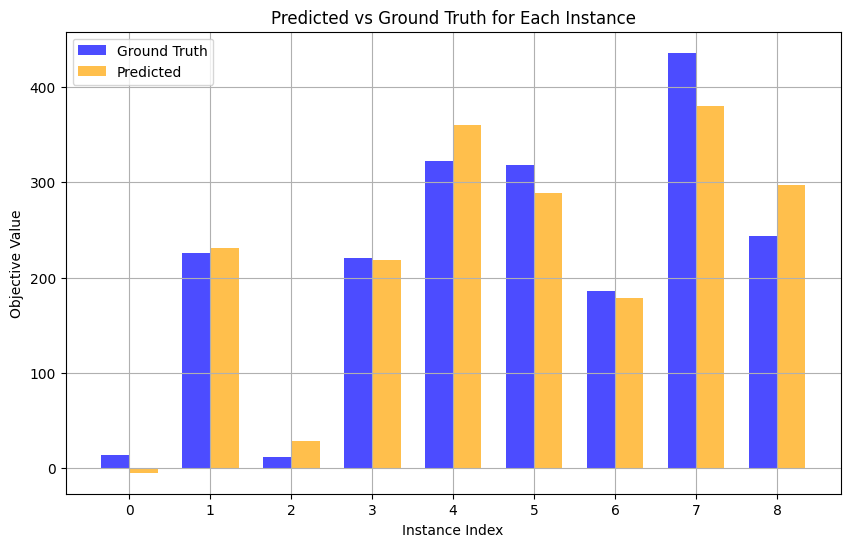

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df_features.drop(columns='obj')
y = df_features['obj']

# Initialize and train the Linear Regressor
model = LinearRegression(positive=False)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

# Display the evaluations
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

plot_predicted_vs_ground_truth(y, predictions)



In [74]:
# Extract the coefficients and intercept from the linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Print the formula of the regressor
formula_terms = " + ".join([f"{coef:.2f}*x{i}" for i, coef in enumerate(coefficients, start=1)])
formula = f"y = {intercept:.2f} + {formula_terms}"
print("Linear Regression Formula:", formula)


Linear Regression Formula: y = -16.12 + 20.61*x1 + -12.98*x2 + -73.06*x3 + 9.72*x4


Best alpha: 0.1
Ridge Mean Squared Error: 990.71
Ridge R-squared: 0.94


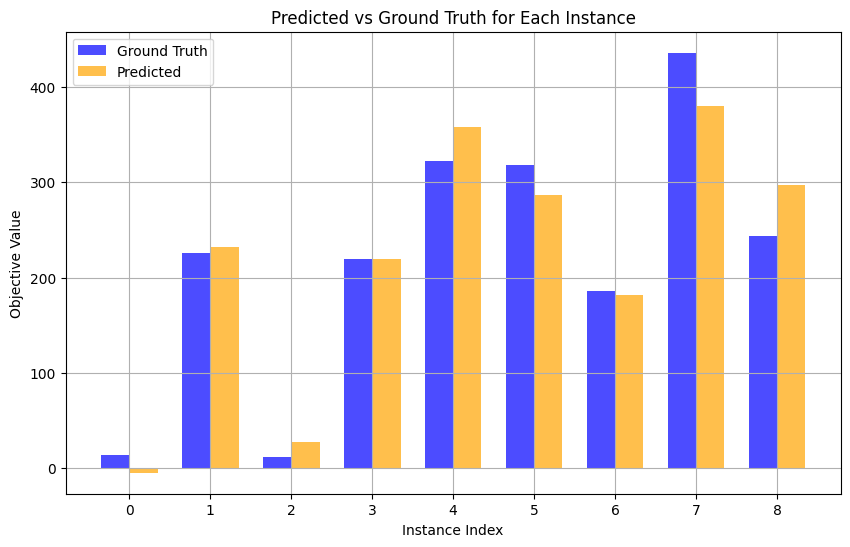

array([ -4.76800358, 231.66302516,  27.83833353, 220.01328813,
       357.82840916, 286.88254681, 181.3319079 , 379.81669842,
       297.39379447])

In [102]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the range of alpha values to test
alpha_range = {'alpha': [0.1, 1.0, 5.0, 10.0, 14.0, 20.0, 50.0, 100.0]}
grid_search = GridSearchCV(Ridge(), alpha_range, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

# Train Ridge model with the best alpha
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X, y)

# Make predictions using the Ridge model
ridge_predictions = ridge_model.predict(X)

# Evaluate the Ridge model
ridge_mse = mean_squared_error(y, ridge_predictions)
ridge_r2 = r2_score(y, ridge_predictions)

# Display the evaluations for the Ridge model
print(f'Ridge Mean Squared Error: {ridge_mse:.2f}')
print(f'Ridge R-squared: {ridge_r2:.2f}')

plot_predicted_vs_ground_truth(y, ridge_predictions)

ridge_predictions

In [110]:
# Calculate the value to add to predictions to ensure they are always above the truth
value_to_add = (y - ridge_predictions).max() + 1e-10

# Ensure the value to add is non-negative
value_to_add = max(0, value_to_add)

print(f"Add {value_to_add:.2f} to predictions to ensure they are always above the truth.")


Add 56.18 to predictions to ensure they are always above the truth.


Ridge Regression Formula: y = 40.10 + 20.16*x1 + -12.66*x2 + -70.89*x3 + 9.49*x4


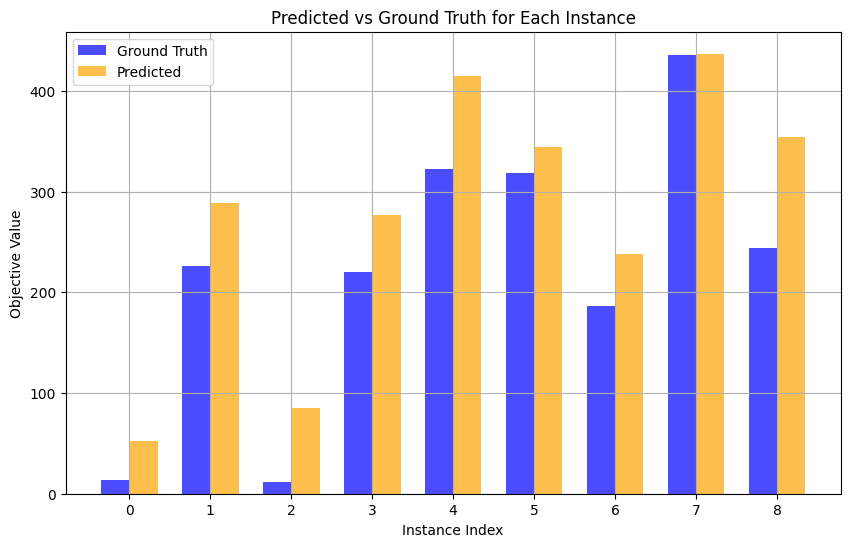

In [116]:
# Adjust the intercept by increasing it by 57
adjusted_intercept = ridge_model.intercept_ + 57
final_ridge_predictions = ridge_predictions + 57

# Display the formula of the Ridge regression model with adjusted intercept
ridge_formula = f"y = {adjusted_intercept:.2f} + " + " + ".join(
    [f"{coef:.2f}*x{i}" for i, coef in enumerate(ridge_model.coef_, start=1)]
)
print(f"Ridge Regression Formula: {ridge_formula}")

# Plot the final adjusted predictions against the ground truth
plot_predicted_vs_ground_truth(y, final_ridge_predictions)


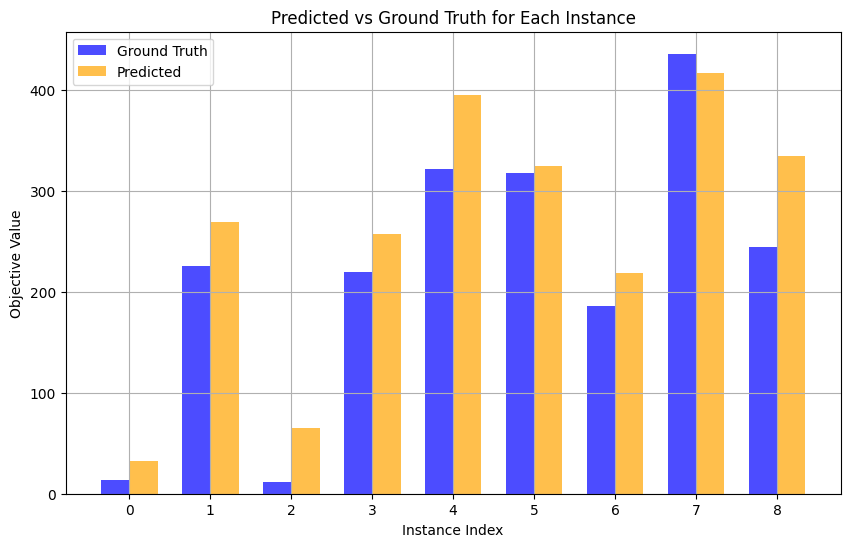

In [146]:
def calculate_ridge_output(features):
    """
    Calculate the output of the Ridge regression model given the features.

    Parameters:
    features (list or array-like): A list or array of feature values [x1, x2, x3, x4].

    Returns:
    float: The calculated output.
    """
    intercept = 20
    coefficients = [ 20.16, -12.66, -70.89, 9.49]
    
    # Ensure the features list has the correct number of elements
    if len(features) != len(coefficients):
        raise ValueError(f"Expected {len(coefficients)} features, but got {len(features)}.")

    # Calculate the output using the formula
    output = intercept + sum(coef * feature for coef, feature in zip(coefficients, features))
    return output

# Calculate the predictions using the calculate_ridge_output function for all instances
ridge_predictions = [calculate_ridge_output([row['mean_distance'], row['mean_capacity'], row['num_couriers'], row['total_item_size']]) for index, row in df.iterrows()]

# Plot the predictions against the ground truth using the plot_predicted_vs_ground_truth function
plot_predicted_vs_ground_truth(y, ridge_predictions)


### Ridge Regression Formula for Calculating the Upper Bound

The Ridge regression model can be represented using the following simplified formula:

$$ y = 40 + 20 \cdot \text{mean\_distance} - 12 \cdot \text{mean\_capacity} - 71 \cdot \text{num\_couriers} + 9.5 \cdot \text{total\_item\_size} $$

Where:
- \( y \): Predicted upper bound
- \( \text{mean\_distance} \): Feature representing the mean distance
- \( \text{mean\_capacity} \): Feature representing the mean capacity
- \( \text{num\_couriers} \): Number of couriers
- \( \text{total\_item\_size} \): Total item size


In [137]:
def calculate_upper_bound_from_dzn(dzn_file_path):
    """
    Calculate the upper bound from a given .dzn file using the Ridge regression formula.

    Parameters:
    dzn_file_path (str): Path to the .dzn file.

    Returns:
    float: The calculated upper bound.
    """
    # Read the .dzn file
    with open(dzn_file_path, 'r') as file:
        dzn_content = file.read()

    # Parse the content of the .dzn file using the provided parsing code
    dzn_data = {}
    for line in dzn_content.splitlines():
        if line.startswith('m ='):
            dzn_data['m'] = int(line.split('=')[1].strip().strip(';'))
        elif line.startswith('n ='):
            dzn_data['n'] = int(line.split('=')[1].strip().strip(';'))
        elif line.startswith('l ='):
            dzn_data['l'] = list(map(int, line.split('=')[1].strip().strip(';').strip('[]').split(',')))
        elif line.startswith('s ='):
            dzn_data['s'] = list(map(int, line.split('=')[1].strip().strip(';').strip('[]').split(',')))
        elif line.startswith('D ='):
            dzn_data['D'] = []
            D_content = line.split('=')[1].strip().strip(';').strip('[| ]')
            for row in D_content.split('|'):
                dzn_data['D'].append(list(map(int, row.strip().split(','))))

    # Extract values from the parsed data
    m = dzn_data['m']
    n = dzn_data['n']
    l = dzn_data['l']
    s = dzn_data['s']
    D = dzn_data['D']

    # Calculate features
    mean_distance = sum(D[n][i] for i in range(n)) / n
    mean_capacity = sum(l) / m
    num_couriers = m
    total_item_size = sum(s)

    # Calculate the upper bound using the Ridge regression formula
    intercept = 40
    coefficients = [20, -12, -71, 9.5]
    features = [mean_distance, mean_capacity, num_couriers, total_item_size]
    upper_bound = intercept + sum(coef * feature for coef, feature in zip(coefficients, features))

    return upper_bound

# Example usage:
upper_bound = calculate_upper_bound_from_dzn('instances_dzn/inst06.dzn')
print(f"Calculated Upper Bound: {upper_bound}")


Calculated Upper Bound: 381.5
